In [2]:
#Load python packages
import pandas as pd
import numpy as np

#Import UFC Fight data, create new variables (columns)
df = pd.read_csv('/Users/gregzaimes/Desktop/UFC/UFC Fight Data.csv')
df["Body_Attempt"] = df["B_avg_BODY_att"]/df["R_avg_BODY_att"]
df["Body_Landed"]=df["B_avg_BODY_landed"]/df["R_avg_BODY_landed"]
df["Clinch_Attempt"]=df["B_avg_CLINCH_att"]/df["R_avg_CLINCH_att"]
df["Clinch_Land"]=df["B_avg_CLINCH_landed"]/df["R_avg_CLINCH_landed"]
df["Distance_Attempt"]=df["B_avg_DISTANCE_att"]/df["R_avg_DISTANCE_att"]
df["Distance_Landed"]=df["B_avg_DISTANCE_landed"]/df["R_avg_DISTANCE_landed"]
df["Ground_Attempt"]=df["B_avg_GROUND_att"]/df["R_avg_GROUND_att"]
df["Ground_Landed"]=df["B_avg_GROUND_landed"]/df["R_avg_GROUND_landed"]
df["Head_Attempt"]=df["B_avg_HEAD_att"]/df["R_avg_HEAD_att"]
df["Head_Landed"]=df["B_avg_HEAD_landed"]/df["R_avg_HEAD_landed"]
df["KD_avg"]=df["B_avg_KD"]/df["R_avg_KD"]
df["Leg_Attempt"]=df["B_avg_LEG_att"]/df["R_avg_LEG_att"]
df["Leg_Landed"]=df["B_avg_LEG_landed"]/df["R_avg_LEG_landed"]
df["Pass_Avg"]=df["B_avg_PASS"]/df["R_avg_PASS"]
df["Rev_Avg"]=df["B_avg_REV"]/df["R_avg_PASS"]
df["Sig_Str_Att"]=df["B_avg_SIG_STR_att"]/df["R_avg_SIG_STR_att"]
df["Sig_Str_Landed"]=df["B_avg_SIG_STR_landed"]/df["R_avg_SIG_STR_landed"]
df["Sig_Str_Pct"]=df["B_avg_SIG_STR_pct"]/df["R_avg_SIG_STR_pct"]
df["Sub_Att"]=df["B_avg_SUB_ATT"]/df["R_avg_SUB_ATT"]
df["TD_Att"]=df["B_avg_TD_att"]/df["R_avg_TD_att"]
df["TD_Landed"]=df["B_avg_TD_landed"]/df["R_avg_TD_landed"]
df["TD_Pct"]=df["B_avg_TD_pct"]/df["R_avg_TD_pct"]
df["Total_Str_Att"]=df["B_avg_TOTAL_STR_att"]/df["R_avg_TOTAL_STR_att"]
df["Total_Str_Landed"]=df["B_avg_TOTAL_STR_landed"]/df["R_avg_TOTAL_STR_landed"]

# Drop and replace any erroneous values (e.g. NaN/Infinity)
df=df.replace([np.inf, -np.inf], np.nan)
df=df.dropna()

In [6]:
# Examine the number of fights for each weight class
df_agg = df.groupby(["weight_class"])['R_fighter'].count()
print(df_agg)

weight_class
Bantamweight             87
Catch Weight              7
Featherweight           153
Flyweight                59
Heavyweight             126
Light Heavyweight       175
Lightweight             331
Middleweight            214
Welterweight            336
Women's Bantamweight     14
Women's Flyweight         3
Women's Strawweight      12
Name: R_fighter, dtype: int64


In [22]:
#Import python package
from sklearn.model_selection import train_test_split

# Choose one of the following weight classes to subset the UFC dataset
# Looking at Welterweight as it has the highest volume of data out of the weight classes
df_sub = df[(df["weight_class"] == "Lightweight") | (df["weight_class"] == "Middleweight") | (df["weight_class"] == "Welterweight")]
# df_sub = df[(df["weight_class"] == "Bantamweight")]
# df_sub = df[(df["weight_class"] == "Featherweight")]
# df_sub= df[(df["weight_class"] == "Welterweight")]

# Set the data and target variables
data = df_sub[["B_current_lose_streak","B_current_win_streak","B_avg_BODY_att","B_avg_BODY_landed","B_avg_CLINCH_att","B_avg_CLINCH_landed","B_avg_DISTANCE_att","B_avg_DISTANCE_landed","B_avg_GROUND_att","B_avg_GROUND_landed","B_avg_HEAD_att","B_avg_HEAD_landed","B_avg_KD","B_avg_LEG_att","B_avg_LEG_landed","B_avg_PASS","B_avg_REV","B_avg_SIG_STR_att","B_avg_SIG_STR_landed","B_avg_SIG_STR_pct","B_avg_SUB_ATT","B_avg_TD_att","B_avg_TD_landed","B_avg_TD_pct","B_avg_TOTAL_STR_att","B_avg_TOTAL_STR_landed","B_longest_win_streak","B_losses","B_avg_opp_BODY_att","B_avg_opp_BODY_landed","B_avg_opp_CLINCH_att","B_avg_opp_CLINCH_landed","B_avg_opp_DISTANCE_att","B_avg_opp_DISTANCE_landed","B_avg_opp_GROUND_att","B_avg_opp_GROUND_landed","B_avg_opp_HEAD_att","B_avg_opp_HEAD_landed","B_avg_opp_KD","B_avg_opp_LEG_att","B_avg_opp_LEG_landed","B_avg_opp_PASS","B_avg_opp_REV","B_avg_opp_SIG_STR_att","B_avg_opp_SIG_STR_landed","B_avg_opp_SIG_STR_pct","B_avg_opp_SUB_ATT","B_avg_opp_TD_att","B_avg_opp_TD_landed","B_avg_opp_TD_pct","B_avg_opp_TOTAL_STR_att","B_avg_opp_TOTAL_STR_landed","B_total_rounds_fought","B_total_time_fought(seconds)","B_total_title_bouts","B_win_by_Decision_Majority","B_win_by_Decision_Split","B_win_by_Decision_Unanimous","B_win_by_KO/TKO","B_win_by_Submission","B_win_by_TKO_Doctor_Stoppage","B_wins","R_current_lose_streak","R_current_win_streak","R_avg_BODY_att","R_avg_BODY_landed","R_avg_CLINCH_att","R_avg_CLINCH_landed","R_avg_DISTANCE_att","R_avg_DISTANCE_landed","R_avg_GROUND_att","R_avg_GROUND_landed","R_avg_HEAD_att","R_avg_HEAD_landed","R_avg_KD","R_avg_LEG_att","R_avg_LEG_landed","R_avg_PASS","R_avg_REV","R_avg_SIG_STR_att","R_avg_SIG_STR_landed","R_avg_SIG_STR_pct","R_avg_SUB_ATT","R_avg_TD_att","R_avg_TD_landed","R_avg_TD_pct","R_avg_TOTAL_STR_att","R_avg_TOTAL_STR_landed","R_longest_win_streak","R_losses","R_avg_opp_BODY_att","R_avg_opp_BODY_landed","R_avg_opp_CLINCH_att","R_avg_opp_CLINCH_landed","R_avg_opp_DISTANCE_att","R_avg_opp_DISTANCE_landed","R_avg_opp_GROUND_att","R_avg_opp_GROUND_landed","R_avg_opp_HEAD_att","R_avg_opp_HEAD_landed","R_avg_opp_KD","R_avg_opp_LEG_att","R_avg_opp_LEG_landed","R_avg_opp_PASS","R_avg_opp_REV","R_avg_opp_SIG_STR_att","R_avg_opp_SIG_STR_landed","R_avg_opp_SIG_STR_pct","R_avg_opp_SUB_ATT","R_avg_opp_TD_att","R_avg_opp_TD_landed","R_avg_opp_TD_pct","R_avg_opp_TOTAL_STR_att","R_avg_opp_TOTAL_STR_landed","R_total_rounds_fought","R_total_time_fought(seconds)","R_total_title_bouts","R_win_by_Decision_Majority","R_win_by_Decision_Split","R_win_by_Decision_Unanimous","R_win_by_KO/TKO","R_win_by_Submission","R_win_by_TKO_Doctor_Stoppage","R_wins"]]
target = df_sub["WinnerNum"]

# Convert the 'data' and target dataframes into numpy arrays. 
# This is the required format for KFold cross validation
data_numpy = data.to_numpy()
target_numpy = target.to_numpy()

In [12]:
# Import python package
from sklearn.preprocessing import RobustScaler

# Scale UFC fight data using 'robust' scaler
# Currently, the robust scaler is scaling the ENTIRE dataset.
# Additional work is needed to apply the robust scaler to individual columns of the dataset
robust = RobustScaler(quantile_range = (0.1,0.9))
data_numpy_transformed = robust.fit_transform(data_numpy)

# Import python package
from sklearn.preprocessing import StandardScaler

# Unfinished - This needs more work
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_numpy)
#df_scaled = pd.DataFrame(scaled_data, columns = )

In [42]:
# Import python packages
from sklearn.model_selection import KFold
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn import metrics

# Parameterize the number of KFolds. For now, set the number of folds equal to 10
kf = KFold(n_splits = 10)

# This splits the data into the number of specified folds
kf.get_n_splits(data_numpy)

# Set up a blank list and DataFrame, for which we will append accuracy scores 
# in the subsequent For-Loop
accuracy = []
all_scores = pd.DataFrame()

# Create For-Loop to loop through the cross folds of the data-set
for train_index, test_index in kf.split(data_numpy):
    X_train, X_test = data_numpy[train_index], data_numpy[test_index]
    y_train, y_test = target_numpy[train_index], target_numpy[test_index]
    
    # Choose the preferred classifier and associated parameters (e.g. max_iter, C, etc.)
    # Currently only 3 are loaded, LinearSVC, LogReg, and Ridge--we can add others
    # ...Ridge Seems to do the best so far...
    #clf = LinearSVC(max_iter=100000, C = 10)
    #clf = LogisticRegression(solver = "lbfgs", C = 10, max_iter = 1000)
    clf = RidgeClassifier()
    clf.fit(X_train,y_train) # Fit the classifer based on X_train, and y_train 
    y_pred=clf.predict(X_test) # Make predictions based on X_test set
    score = metrics.accuracy_score(y_test, y_pred) # Determine the Model accuracy 
    accuracy.append(score) # Append the accuracy scores to the 'accuracy' list
all_scores["Folds"] = accuracy # Port the accuracy scores into the all_scores DataFrame

In [51]:
# Print the Classifier Accuracies across the KFolds
print(all_scores)
print("Average Accuracy: " + str(all_scores["Folds"].mean()))

      Folds
0  0.573034
1  0.636364
2  0.625000
3  0.556818
4  0.602273
5  0.659091
6  0.602273
7  0.556818
8  0.715909
9  0.863636
Average Accuracy: 0.6391215526046986


/Users/gregzaimes/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


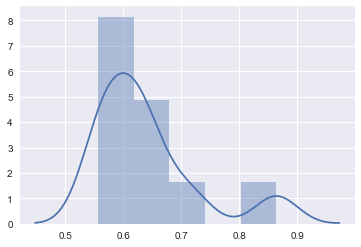

In [44]:
# Import Python Modules
import seaborn as sns
import matplotlib.pyplot as plt

# Use Seaborn to Create a histogram of the Accuracies between the KFolds
%matplotlib inline 
sns.distplot(accuracy)

In [ ]:
# Pull out and sort the Feature Weights of the Classifier
# This need more work and is not properly working at the moment
coef = clf.coef_[0]
coef_abs =abs(coef)
coef_sort = coef_abs.sort
print (coef_sort)